In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
from sklearn import linear_model, svm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, VotingRegressor

from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score
from sklearn.neural_network import MLPRegressor, BernoulliRBM

In [5]:
def metric_battery(model, X, y):
    score = model.score(X, y)
    prediction = model.predict(X)
    mean_error = mean_squared_error(y, prediction, squared=False)
    evs = explained_variance_score(y, prediction, multioutput='uniform_average')
    r2 = r2_score(y, prediction)
    cross_val = cross_val_score(model, X, y, cv=3)
    return {
        "                   score": score,
        "                r2 score": score,
        "              mean error": mean_error,
        "explained variance score": evs,
        " 3 fold cross validation": cross_val.mean()
    }

In [6]:
table = pd.read_csv('present_data_all.csv').fillna(0)

In [7]:
X = table.iloc[:,3:11] # this is the temp and precip data
carbon = table.iloc[:,11] # this is the carbon data, this is a continuous attribute
vegetation = table.iloc[:,12] # this is the veg data, this is a classification problem

In [8]:
# this are the varbales for carbon
X_train, X_test, y_train, y_test = train_test_split(X, carbon, test_size=0.33, random_state=42)

In [9]:
# this linear regression is the baseline for predicting carbon data
reg = LinearRegression().fit(X_train, y_train)

In [10]:
metric_battery(reg, X_test, y_test)

{'                   score': 0.7179328153688976,
 '                r2 score': 0.7179328153688976,
 '              mean error': 18.126994224937068,
 'explained variance score': 0.7179571630063608,
 ' 3 fold cross validation': 0.7183538605716976}

Text(0.5, 0, 'Feature Importance')

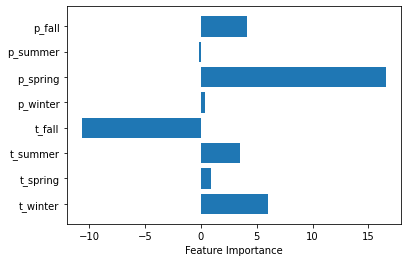

In [11]:
plt.barh(X.columns, reg.coef_)
plt.xlabel("Feature Importance")

In [12]:
# this random forest is to see if any variables are less important for predicting carbon data
est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='ls').fit(X_train, y_train)

In [13]:
metric_battery(est, X_test, y_test)

{'                   score': 0.786469576610559,
 '                r2 score': 0.786469576610559,
 '              mean error': 15.771732230345679,
 'explained variance score': 0.7864718943409513,
 ' 3 fold cross validation': 0.7846910701409983}

Text(0.5, 0, 'Feature Importance')

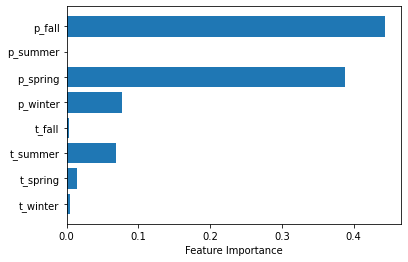

In [14]:
# we find that some features matter more than others when predicting carbon density
# precipitation in the summer and the temperature in the fall, spring, and winter have little to no bearing on the carbon density
# TODO: need way to confirm
plt.barh(X.columns, est.feature_importances_)
plt.xlabel("Feature Importance")

In [15]:
# so if we create models only using those columns
reduced_X = table.loc[:,['p_fall', 'p_spring', 'p_winter', 't_summer']]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(reduced_X, carbon, test_size=0.33, random_state=42)

In [17]:
est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='ls').fit(X_train, y_train)

In [18]:
metric_battery(est, X_test, y_test)

{'                   score': 0.7837392419677456,
 '                r2 score': 0.7837392419677456,
 '              mean error': 15.87224560097183,
 'explained variance score': 0.7837440576142792,
 ' 3 fold cross validation': 0.7845826588283241}

In [19]:
# checking for overfitting
metric_battery(est, X_train, y_train)

{'                   score': 0.8228313015851094,
 '                r2 score': 0.8228313015851094,
 '              mean error': 14.568921569526664,
 'explained variance score': 0.8228313015851094,
 ' 3 fold cross validation': 0.7962298163639504}

In [20]:
# attpmeting to see if there is a better n value for the Gradient boost regeressor
# n = [c for c in range(260,280,1)]
# lr = [c for c in range(1,10,1)]
# md = [c for c in range(1,3,1)]
# result = [[[e for e in range(len(md))] for d in range(len(lr))] for c in range(len(n))]

# for i in range(len(n)):
#     for j in range(len(lr)):
#         for k in range(len(md)):
#             est = GradientBoostingRegressor(n_estimators=n[i], learning_rate=lr[j]/10, max_depth=md[k], random_state=0, loss='ls').fit(X_train, y_train)
#             prediction = est.predict(X_test)
#             test_results = metric_battery(est, X_test, y_test)
#             train_results = metric_battery(est, X_train, y_train)
#             result[i][j][k] = ((i,j,k), test_results['explained variance score'], train_results['explained variance score'], test_results['explained variance score']-train_results['explained variance score'])

In [21]:
# result[0][0][0]

In [22]:
# final = []
# for i in result:
#     for j in i:
#         for k in j:
#             final.append(k)

In [23]:
# s = sorted(final, key=lambda x:(x[1], x[3]))
# col1 = [c[1] for c in s[300:350]]
# col3 = [c[3] for c in s[300:350]]
# s[-1]

In [24]:
# plt.plot([c+1 for c in range(len(col1))], col1)

In [25]:
# plt.plot([c+1 for c in range(len(col1))], col3)

In [26]:
# s[317:322]

In [27]:
# (16, 0, 1)
#(1, 0, 0), much better
# print(n[1])
# print(lr[0])
# print(md[0])

In [28]:
est = GradientBoostingRegressor(n_estimators=261, learning_rate=0.1, max_depth=1, random_state=0, loss='ls').fit(X_train, y_train)

In [29]:
metric_battery(est, X_test, y_test)

{'                   score': 0.7894497529696199,
 '                r2 score': 0.7894497529696199,
 '              mean error': 15.661284976014146,
 'explained variance score': 0.7894549376905593,
 ' 3 fold cross validation': 0.782723544240976}

In [30]:
# checking for overfitting
metric_battery(est, X_train, y_train)

{'                   score': 0.8343827701857726,
 '                r2 score': 0.8343827701857726,
 '              mean error': 14.085966983613481,
 'explained variance score': 0.8343827701857726,
 ' 3 fold cross validation': 0.7947219332264946}

Text(0.5, 0, 'Feature Importance')

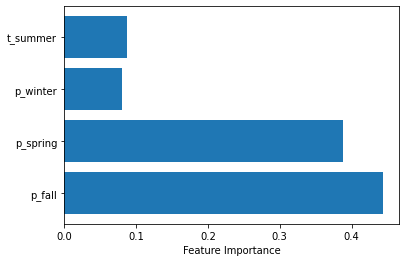

In [87]:
# this model does not seem to be over fitting

plt.barh(reduced_X.columns, est.feature_importances_)
plt.xlabel("Feature Importance")

In [32]:
clf = linear_model.BayesianRidge().fit(X_train, y_train)

In [33]:
metric_battery(clf, X_test, y_test)

{'                   score': 0.7077584105293921,
 '                r2 score': 0.7077584105293921,
 '              mean error': 18.451026183122014,
 'explained variance score': 0.7078123693993563,
 ' 3 fold cross validation': 0.7089660146537353}

In [34]:
# checking for overfitting
metric_battery(clf, X_train, y_train)

{'                   score': 0.7402710684837955,
 '                r2 score': 0.7402710684837955,
 '              mean error': 17.639816883740966,
 'explained variance score': 0.7402710684837954,
 ' 3 fold cross validation': 0.7388219891534727}

In [35]:
clf.get_params()

{'alpha_1': 1e-06,
 'alpha_2': 1e-06,
 'alpha_init': None,
 'compute_score': False,
 'copy_X': True,
 'fit_intercept': True,
 'lambda_1': 1e-06,
 'lambda_2': 1e-06,
 'lambda_init': None,
 'n_iter': 300,
 'normalize': False,
 'tol': 0.001,
 'verbose': False}

In [36]:
regr = svm.SVR().fit(X_train, y_train)

In [37]:
metric_battery(regr, X_test, y_test)

{'                   score': 0.663845418963067,
 '                r2 score': 0.663845418963067,
 '              mean error': 19.788780512427202,
 'explained variance score': 0.6814323303655834,
 ' 3 fold cross validation': 0.4875412074525189}

In [38]:
# checking for overfitting
metric_battery(regr, X_train, y_train)

{'                   score': 0.693005893312577,
 '                r2 score': 0.693005893312577,
 '              mean error': 19.177806274241192,
 'explained variance score': 0.709409128925586,
 ' 3 fold cross validation': 0.6515617997704931}

In [39]:
regr = svm.SVR(kernel="poly", degree=3).fit(X_train, y_train)

In [40]:
metric_battery(regr, X_test, y_test)

{'                   score': 0.5360726226907879,
 '                r2 score': 0.5360726226907879,
 '              mean error': 23.247406808682562,
 'explained variance score': 0.5846091028717106,
 ' 3 fold cross validation': 0.4683592699259879}

In [41]:
# checking for overfitting
metric_battery(regr, X_train, y_train)

{'                   score': 0.5227400884225981,
 '                r2 score': 0.5227400884225981,
 '              mean error': 23.911751364682846,
 'explained variance score': 0.5726726951056724,
 ' 3 fold cross validation': 0.5002438594290561}

In [42]:
ada = AdaBoostRegressor(random_state=0, n_estimators=100).fit(X_train, y_train)

In [43]:
metric_battery(ada, X_test, y_test)

{'                   score': 0.6402889075332638,
 '                r2 score': 0.6402889075332638,
 '              mean error': 20.47040474537528,
 'explained variance score': 0.7275865945053513,
 ' 3 fold cross validation': 0.765696680908722}

In [44]:
# checking for overfitting
metric_battery(ada, X_train, y_train)

{'                   score': 0.7093852051602937,
 '                r2 score': 0.7093852051602937,
 '              mean error': 18.659189183300672,
 'explained variance score': 0.7925527278521058,
 ' 3 fold cross validation': 0.7616379035729}

In [45]:
ereg = VotingRegressor(estimators=[('BayesianRidge', clf), ('GradientBoost', est)]).fit(X_train, y_train)

In [46]:
metric_battery(ereg, X_test, y_test)

{'                   score': 0.767249306887302,
 '                r2 score': 0.767249306887302,
 '              mean error': 16.46626141774147,
 'explained variance score': 0.7672724558239937,
 ' 3 fold cross validation': 0.7693482800065486}

In [47]:
# checking for overfitting
metric_battery(ereg, X_train, y_train)

{'                   score': 0.805456226327408,
 '                r2 score': 0.805456226327408,
 '              mean error': 15.266608758597151,
 'explained variance score': 0.8054562263274081,
 ' 3 fold cross validation': 0.7872115358711221}

In [48]:
NNR = MLPRegressor(random_state=1, max_iter=1750).fit(X_train, y_train)

In [49]:
metric_battery(NNR, X_test, y_test)

{'                   score': 0.7628579932416217,
 '                r2 score': 0.7628579932416217,
 '              mean error': 16.620870273604,
 'explained variance score': 0.7632588915245,
 ' 3 fold cross validation': 0.751868018539349}

In [50]:
# checking for overfitting
metric_battery(NNR, X_train, y_train)

{'                   score': 0.8010094984879417,
 '                r2 score': 0.8010094984879417,
 '              mean error': 15.440099023190902,
 'explained variance score': 0.8012334878985294,
 ' 3 fold cross validation': 0.7583119086439639}

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, carbon, test_size=0.33, random_state=42)
rcp45Dry = pd.read_csv('physicshub_dir/data/class/hackathon/PUBLIC/DATASETS/ClimateChangeCali/future_climate_rcp45_dry.csv').iloc[:,1:]
rcp45Mean = pd.read_csv('physicshub_dir/data/class/hackathon/PUBLIC/DATASETS/ClimateChangeCali/future_climate_rcp45_mean.csv').iloc[:,1:]
rcp45Wet = pd.read_csv('physicshub_dir/data/class/hackathon/PUBLIC/DATASETS/ClimateChangeCali/future_climate_rcp45_wet.csv').iloc[:,1:]
rcp85Dry = pd.read_csv('physicshub_dir/data/class/hackathon/PUBLIC/DATASETS/ClimateChangeCali/future_climate_rcp85_dry.csv').iloc[:,1:]
rcp85Mean = pd.read_csv('physicshub_dir/data/class/hackathon/PUBLIC/DATASETS/ClimateChangeCali/future_climate_rcp85_mean.csv').iloc[:,1:]
rcp85Wet = pd.read_csv('physicshub_dir/data/class/hackathon/PUBLIC/DATASETS/ClimateChangeCali/future_climate_rcp85_wet.csv').iloc[:,1:]

In [75]:
X_train, X_test, y_train, y_test = train_test_split(reduced_X, carbon, test_size=0.33, random_state=42)
rcp45Dry = pd.read_csv('physicshub_dir/data/class/hackathon/PUBLIC/DATASETS/ClimateChangeCali/future_climate_rcp45_dry.csv').loc[:,['p_fall', 'p_spring', 'p_winter', 't_summer']]
rcp45Mean = pd.read_csv('physicshub_dir/data/class/hackathon/PUBLIC/DATASETS/ClimateChangeCali/future_climate_rcp45_mean.csv').loc[:,['p_fall', 'p_spring', 'p_winter', 't_summer']]
rcp45Wet = pd.read_csv('physicshub_dir/data/class/hackathon/PUBLIC/DATASETS/ClimateChangeCali/future_climate_rcp45_wet.csv').loc[:,['p_fall', 'p_spring', 'p_winter', 't_summer']]
rcp85Dry = pd.read_csv('physicshub_dir/data/class/hackathon/PUBLIC/DATASETS/ClimateChangeCali/future_climate_rcp85_dry.csv').loc[:,['p_fall', 'p_spring', 'p_winter', 't_summer']]
rcp85Mean = pd.read_csv('physicshub_dir/data/class/hackathon/PUBLIC/DATASETS/ClimateChangeCali/future_climate_rcp85_mean.csv').loc[:,['p_fall', 'p_spring', 'p_winter', 't_summer']]
rcp85Wet = pd.read_csv('physicshub_dir/data/class/hackathon/PUBLIC/DATASETS/ClimateChangeCali/future_climate_rcp85_wet.csv').loc[:,['p_fall', 'p_spring', 'p_winter', 't_summer']]

In [123]:
useThis = GradientBoostingRegressor(n_estimators=261, learning_rate=0.1, max_depth=1, random_state=0, loss='ls').fit(X_train, y_train)

In [131]:
useThis = linear_model.BayesianRidge().fit(X_train, y_train)

In [137]:
useThis = VotingRegressor(estimators=[('BayesianRidge', clf), ('GradientBoost', est)]).fit(X_train, y_train)

In [138]:
rcp45Dry_carbon = useThis.predict(rcp45Dry)
rcp45Mean_carbon = useThis.predict(rcp45Mean)
rcp45Wet_carbon = useThis.predict(rcp45Wet)
rcp85Dry_carbon = useThis.predict(rcp85Dry)
rcp85Mean_carbon = useThis.predict(rcp85Mean)
rcp85Wet_carbon = useThis.predict(rcp85Wet)
carbons = [rcp45Dry_carbon, rcp45Mean_carbon, rcp45Wet_carbon, rcp85Dry_carbon, rcp85Mean_carbon, rcp85Wet_carbon]
carbon_names = ["rcp45Dry_carbon", "rcp45Mean_carbon", "rcp45Wet_carbon", "rcp85Dry_carbon", "rcp85Mean_carbon", "rcp85Wet_carbon"]

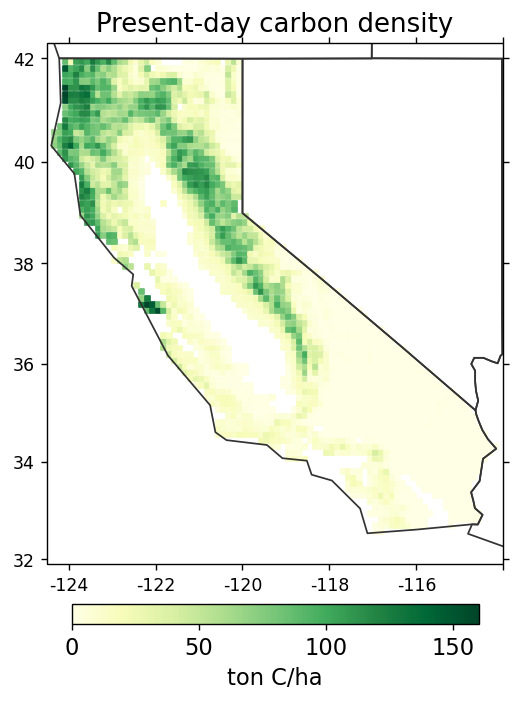

In [139]:
fig = plt.figure(figsize=(7,7), dpi=125)
ax = fig.add_subplot(111, projection=ccrs.Miller())
ax.set_extent([235.5,246,33,45], crs=ccrs.Miller())
plot = ax.scatter(table.longitude, table.latitude, c=table.carb, s=8, transform=ccrs.PlateCarree(), cmap='YlGn', marker='s', vmin=0, vmax=160)
ax.set_title('Present-day carbon density', fontsize=15)
states = cartopy.feature.NaturalEarthFeature(category='cultural',name='admin_1_states_provinces_lakes_shp',scale='110m',facecolor='none')
ax.add_feature(states, edgecolor='0.2')
cbar = plt.colorbar(plot, orientation='horizontal', shrink=0.6, pad=0.06)
cbar.set_label('ton C/ha', size=13)
cbar.ax.tick_params(labelsize=13)
ax.set_xticks([236,238,240,242,244,246], crs=ccrs.PlateCarree())
ax.set_yticks([32,34,36,38,40,42], crs=ccrs.PlateCarree())
ax.set_xticklabels([-124,-122,-120,-118,-116,''])
ax.set_yticklabels([32,34,36,38,40,42])
ax.tick_params(top=True, right=True)

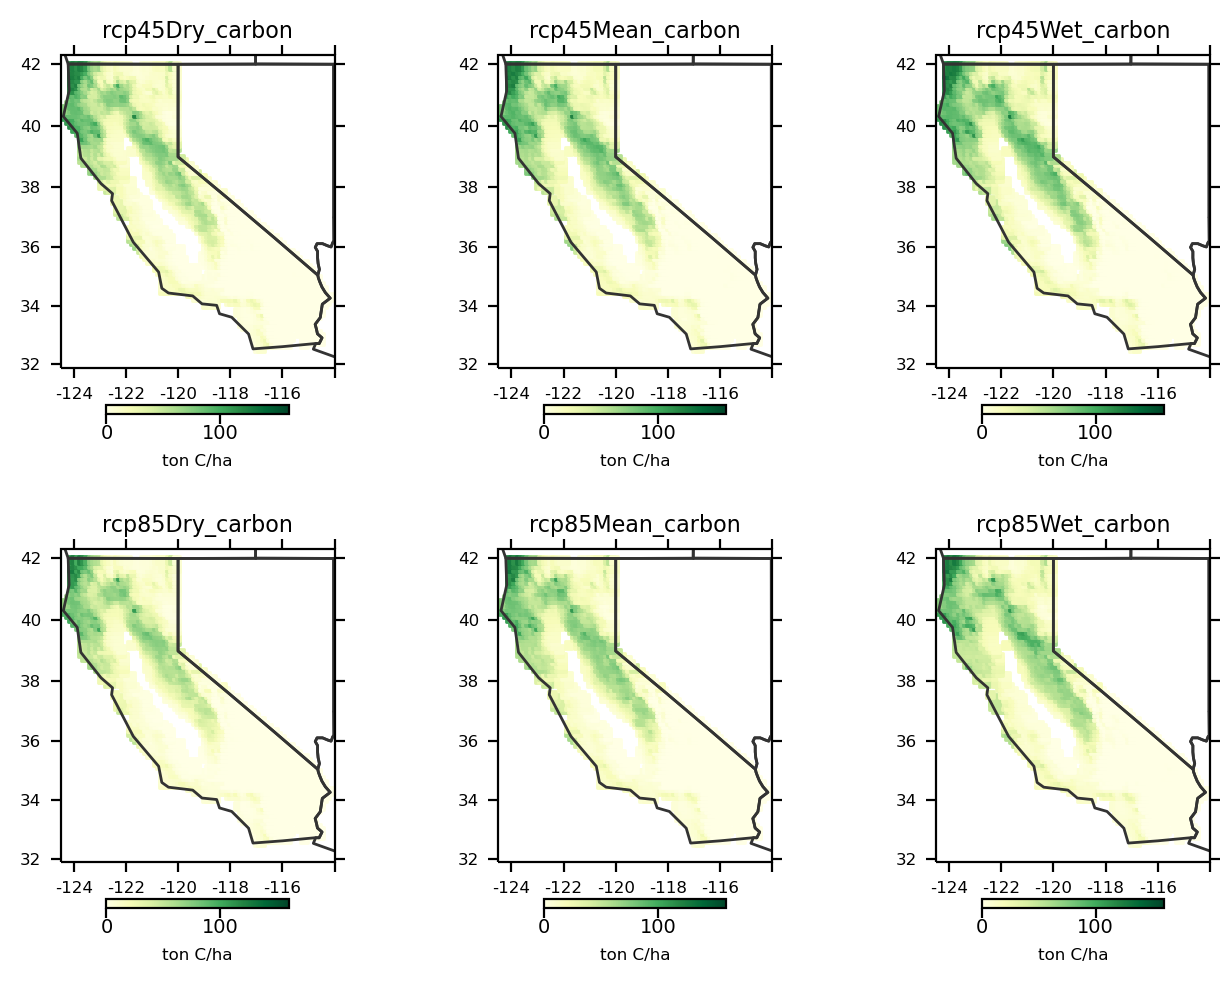

In [140]:
fig = plt.figure(figsize=(8,6), dpi=200)
for i in range(6):
    ax = fig.add_subplot(2,3,i+1, projection=ccrs.Miller())
    ax.set_extent([235.5,246,33,45], crs=ccrs.Miller())
    plot = ax.scatter(table.longitude, table.latitude, c=carbons[i], s=8, transform=ccrs.PlateCarree(), cmap='YlGn', marker='s', vmin=0, vmax=160)
    ax.set_title(carbon_names[i], fontsize=8)
    states = cartopy.feature.NaturalEarthFeature(category='cultural',name='admin_1_states_provinces_lakes_shp',scale='110m',facecolor='none')
    ax.add_feature(states, edgecolor='0.2')
    cbar = plt.colorbar(plot, orientation='horizontal', shrink=0.5, pad=0.09)
    cbar.set_label('ton C/ha', size=6)
    cbar.ax.tick_params(labelsize=7, pad=0.09)
    ax.set_xticks([236,238,240,242,244,246], crs=ccrs.PlateCarree())
    ax.set_yticks([32,34,36,38,40,42], crs=ccrs.PlateCarree())
    ax.set_xticklabels([-124,-122,-120,-118,-116,''], size=6)
    ax.set_yticklabels([32,34,36,38,40,42], size=6)
    ax.tick_params(top=True, right=True)

In [142]:
print("original sum of carbon: %.2f ton C/ha" % table.carb.sum())
print("What is the difference in carbon relative to the original data set?\n")
for i in range(len(carbons)):
    s = "{} {:.2f} ton C/ha".format(carbon_names[i]+":", table.carb.sum() - carbons[i].sum())
    print(s)

original sum of carbon: 61606.35 ton C/ha
What is the difference in carbon relative to the original data set?

rcp45Dry_carbon: 6612.01 ton C/ha
rcp45Mean_carbon: -1059.22 ton C/ha
rcp45Wet_carbon: -5532.52 ton C/ha
rcp85Dry_carbon: 14196.14 ton C/ha
rcp85Mean_carbon: 5152.60 ton C/ha
rcp85Wet_carbon: -257.86 ton C/ha
